In [72]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [73]:
df_2k = pd.read_csv('nba2k20-full.csv')

In [74]:
df_2k

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
5,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,Davidson
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,Kentucky
7,Paul George,93,#13,Los Angeles Clippers,F,05/02/90,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,Fresno State
8,Damian Lillard,92,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,Weber State
9,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,Kansas


In [75]:
# Function to convert height from feet-inches to meters
def convert_height(height):
    parts = height.split("/")
    if len(parts) >= 2:
        feet_inches = parts[0].strip()
        total_inches = int(feet_inches.split("-")[0]) * 12 + int(feet_inches.split("-")[1])
        return round(total_inches * 0.0254, 2)
    

def convert_weight(weight):
    parts = weight.split("/")
    if len(parts) >= 2:
        pounds = parts[0].strip().split(" ")[0]
        kilograms = float(pounds) * 0.45359237
        return round(kilograms, 2)
    


def from_date_to_age(b_day):
    """
    Convert birthdate from string in format mm/dd/yy to age in years.
    
    Parameters:
    b_day (str): Birthdate as a string in the format mm/dd/yy
    
    Returns:
    int: Age in years
    """
    
    # Current date
    today = datetime.now()
    
    # Convert birthdate from string to datetime
    birth_date = datetime.strptime(b_day, '%m/%d/%y')
    
    # Adjust for the year if it's obviously in the past
    if birth_date > today:
        # This adjusts for a two-digit year input which assumes 20th century (1900s)
        birth_date = birth_date.replace(year=birth_date.year - 100)
    
    # Calculate age
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    
    return age

In [76]:
df_2k

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
5,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,Davidson
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,Kentucky
7,Paul George,93,#13,Los Angeles Clippers,F,05/02/90,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,Fresno State
8,Damian Lillard,92,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,Weber State
9,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,Kansas


In [77]:
# Convert height to meters and create a new column "height_in_m"
df_2k["height_in_m"] = df_2k["height"].apply(lambda x: convert_height(x))

# Convert weight to kilograms and create a new column "weight_in_kg"
df_2k["weight_in_kg"] = df_2k["weight"].apply(lambda x: convert_weight(x))

In [78]:
# Remove dollar sign from salary column and convert to integer
df_2k["salary"] = df_2k["salary"].str.replace("$", "").astype(int)

# Calculate current age and create a new column "current_age"
df_2k["current_age"] = df_2k["b_day"].apply(lambda x: from_date_to_age(x))

# Calculate years played
df_2k["years_played"] = 2023 - df_2k["draft_year"]

# Replace "Undrafted" with 0 in draft_round and draft_peak columns
df_2k["draft_round"] = df_2k["draft_round"].replace({"Undrafted": 0})
df_2k["draft_peak"] = df_2k["draft_peak"].replace({"Undrafted": 0})

# Drop the "b_day" column
df_2k.drop(columns=["b_day","college"], inplace=True)

# Calculate body mass index (BMI) and create a new column "body_mass_index"
df_2k["body_mass_index"] = df_2k["weight_in_kg"] / ((df_2k["height_in_m"] / 100) ** 2)

# Categorize BMI into "Underweight", "Normal", "Overweight", and "Obese"
df_2k["bmi_class"] = pd.cut(df_2k["body_mass_index"], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=["Underweight", "Normal", "Overweight", "Obese"], right=False)




In [79]:
# Drop the original height and weight columns
df_2k.drop(columns=["height", "weight"], inplace=True)


In [80]:
df_2k.head(5)

,full_name,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,height_in_m,weight_in_kg,current_age,years_played,body_mass_index,bmi_class
0,LeBron James,97,#23,Los Angeles Lakers,F,37436858,USA,2003,1,1,2.06,113.40,38,20,267225.940239,Obese
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,32742000,USA,2011,1,15,2.01,102.06,32,12,252617.509468,Obese
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15,2.11,109.77,29,10,246557.804182,Obese
3,Kevin Durant,96,#7,Brooklyn Nets,F,37199000,USA,2007,1,2,2.08,104.33,35,16,241147.374260,Obese
4,James Harden,96,#13,Houston Rockets,G,38199000,USA,2009,1,3,1.96,99.79,34,14,259761.557684,Obese


In [81]:
df_2k_unique = df_2k.drop_duplicates(subset='full_name', keep='first')

In [82]:
df_2k_unique

,full_name,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,height_in_m,weight_in_kg,current_age,years_played,body_mass_index,bmi_class
0,LeBron James,97,#23,Los Angeles Lakers,F,37436858,USA,2003,1,1,2.06,113.40,38,20,267225.940239,Obese
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,32742000,USA,2011,1,15,2.01,102.06,32,12,252617.509468,Obese
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15,2.11,109.77,29,10,246557.804182,Obese
3,Kevin Durant,96,#7,Brooklyn Nets,F,37199000,USA,2007,1,2,2.08,104.33,35,16,241147.374260,Obese
4,James Harden,96,#13,Houston Rockets,G,38199000,USA,2009,1,3,1.96,99.79,34,14,259761.557684,Obese
5,Stephen Curry,95,#30,Golden State Warriors,G,40231758,USA,2009,1,7,1.91,83.91,35,14,230010.142266,Obese
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,2.08,100.70,30,11,232757.026627,Obese
7,Paul George,93,#13,Los Angeles Clippers,F,33005556,USA,2010,1,10,2.03,95.25,33,13,231138.828897,Obese
8,Damian Lillard,92,#0,Portland Trail Blazers,G,29802321,USA,2012,1,6,1.88,88.45,33,11,250254.640109,Obese
9,Joel Embiid,91,#21,Philadelphia 76ers,C,27504630,Cameroon,2014,1,3,2.13,113.40,29,9,249950.406665,Obese


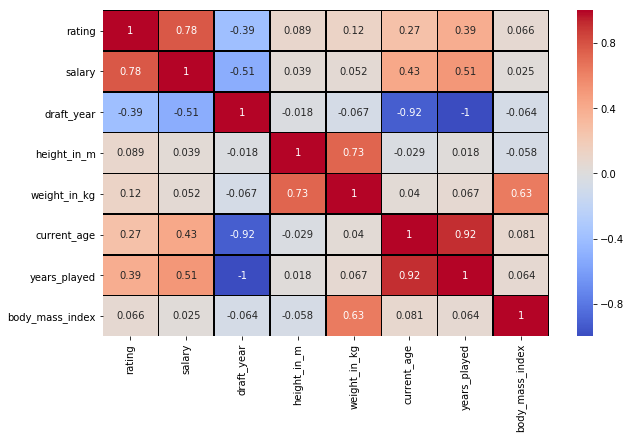

In [83]:
#EDA
plt.figure(figsize=(10,6))
sns.heatmap(df_2k_unique.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='coolwarm')
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


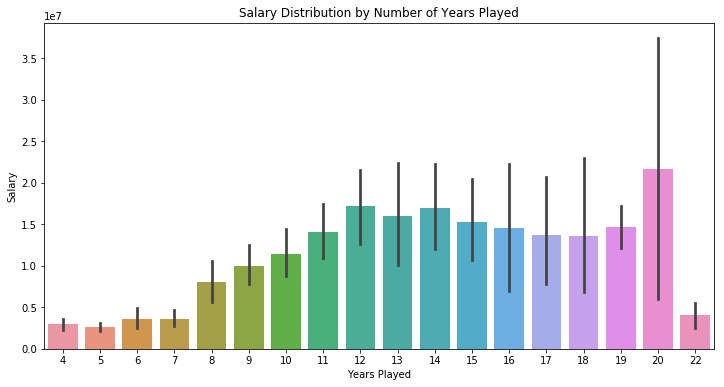

In [84]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='years_played', y='salary', data=df_2k_unique)
plt.xlabel('Years Played')
plt.ylabel('Salary')
plt.title('Salary Distribution by Number of Years Played')
plt.show()

In [85]:
df_2k.describe()

,rating,salary,draft_year,height_in_m,weight_in_kg,current_age,years_played,body_mass_index
count,429.000000,4.290000e+02,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,76.372960,8.530080e+06,2014.093240,1.995641,97.215618,29.804196,8.906760,243760.711995
std,5.657748,9.218059e+06,3.937678,0.083514,10.535048,4.113334,3.937678,17817.546719
min,67.000000,5.000000e+04,2001.000000,1.750000,77.110000,22.000000,4.000000,203212.791763
25%,72.000000,2.000000e+06,2012.000000,1.930000,89.360000,27.000000,6.000000,231361.915756
50%,75.000000,4.380120e+06,2015.000000,2.010000,96.620000,29.000000,8.000000,242060.599750
75%,79.000000,1.220000e+07,2017.000000,2.060000,104.330000,33.000000,11.000000,254869.928962
max,97.000000,4.023176e+07,2019.000000,2.240000,131.540000,43.000000,22.000000,328588.919498


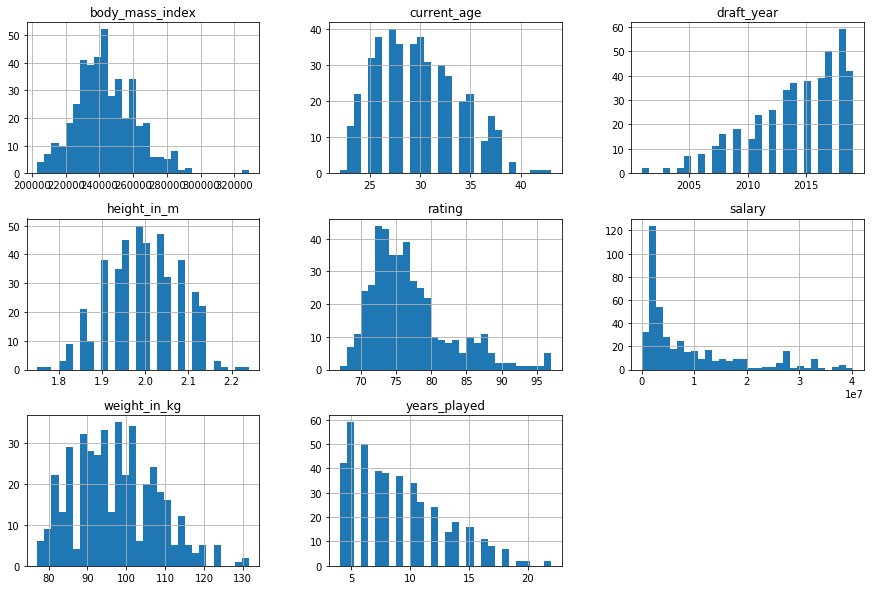

In [86]:
df_2k.hist(bins=30,figsize=(15,10))
plt.show()

In [87]:
#OLS
X = df_2k_unique[['rating', 'current_age', 'years_played']]  # Independent variables
y = df_2k_unique['salary']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Performing OLS regression
model = sm.OLS(y, X).fit()

# Model summary
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     269.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.67e-98
Time:                        21:19:14   Log-Likelihood:                -7259.6
No. Observations:                 429   AIC:                         1.453e+04
Df Residuals:                     425   BIC:                         1.454e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.877e+07   5.76e+06    -15.402      0.000      -1e+08   -7.74e+07
rating        1.128e+06   5.21e+04     21.662      0.000    1.03e+06    1.23e+06
current_age   2.882e+05   1.66e+05      1.734      0.084   -3.84e+04    6.15e+05
years_played  2.893e+05   1.82e+05      1.592      0.112   -6.79e+04    6.46e+05
==============================================================================
Omnibus:                       14.344   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.808
Skew:                           0.200   Prob(JB):                     4.10e-06
Kurtosis:                       4.108   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#WLS
X = df_2k_unique[['rating', 'current_age', 'years_played']]  # Independent variables
y = df_2k_unique['salary']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Define your weights, for example, using a numpy array
weights = np.ones(len(X))  # Default: equal weights for all observations
# You can customize the weights as needed

# Perform Weighted Least Squares (WLS) regression
wls_model = sm.WLS(y, X, weights=1 / (weights ** 2))  # You can adjust the weight calculation as needed
results = wls_model.fit()

# Print the results summary
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.655
Model:                            WLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     269.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.67e-98
Time:                        21:59:32   Log-Likelihood:                -7259.6
No. Observations:                 429   AIC:                         1.453e+04
Df Residuals:                     425   BIC:                         1.454e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.877e+07   5.76e+06    -15.402   

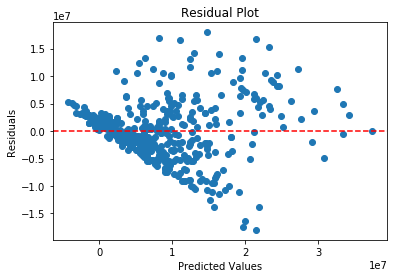

In [89]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = sm.add_constant(df_2k_unique[['rating', 'current_age', 'years_played']])
y = df_2k_unique['salary']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the model's residuals
residuals = model.resid

# Plotting the residuals
plt.scatter(model.predict(), residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


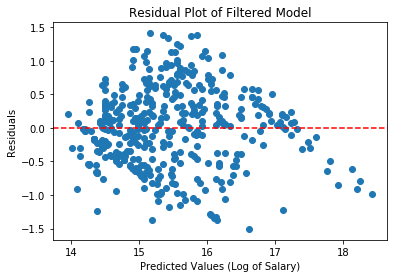

Breusch-Pagan Test Results on Filtered Data: {'Lagrange Multiplier statistic': 15.710230374793834, 'p-value': 0.0013001278386174798, 'f-value': 5.3930653332106795, 'f p-value': 0.0011982674203857198}


In [90]:
#Homoscedasticity Test & Log Transformation

df_2k_unique['salary_log'] = np.log(df_2k_unique['salary'] + 1)  # Avoid log(0)

# Linear Regression Model
X = sm.add_constant(df_2k_unique[['rating', 'current_age', 'years_played']])
y_transformed = df_2k_unique['salary_log']
model_transformed = sm.OLS(y_transformed, X).fit()

# Residuals of the Transformed Model
residuals_transformed = model_transformed.resid
filtered_df = df_2k_unique[(model_transformed.resid > -1.5) & (model_transformed.resid < 1.5)]

# Re-fit the regression model with the filtered data
X_filtered = sm.add_constant(filtered_df[['rating', 'current_age', 'years_played']])
y_filtered = filtered_df['salary_log']
model_filtered = sm.OLS(y_filtered, X_filtered).fit()

# Residuals of the Filtered Model
residuals_filtered = model_filtered.resid

# Breusch-Pagan Test on the Filtered Model
bp_test_filtered = het_breuschpagan(residuals_filtered, model_filtered.model.exog)
bp_test_filtered_results = {
    'Lagrange Multiplier statistic': bp_test_filtered[0],
    'p-value': bp_test_filtered[1],
    'f-value': bp_test_filtered[2],
    'f p-value': bp_test_filtered[3]
}

# Plotting the Residuals of the Filtered Model
plt.scatter(model_filtered.predict(), residuals_filtered)
plt.title('Residual Plot of Filtered Model')
plt.xlabel('Predicted Values (Log of Salary)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Print the Breusch-Pagan Test Results of the Filtered Model
print("Breusch-Pagan Test Results on Filtered Data:", bp_test_filtered_results)


In [91]:
model_filtered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_log   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     282.7
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.81e-99
Time:                        21:19:15   Log-Likelihood:                -362.03
No. Observations:                 408   AIC:                             732.1
Df Residuals:                     404   BIC:                             748.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4327      0.644      8.433      0.000       4.166       6.699
rating           0.1222      0.006     20.750      0.000       0.111       0.134
current_age     -0.0032      0.018     -0.171      0.864      -0.039       0.033
years_played     0.0852      0.020      4.227      0.000       0.046       0.125
==============================================================================
Omnibus:                        4.014   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.891
Skew:                          -0.017   Prob(JB):                        0.236
Kurtosis:                       2.589   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

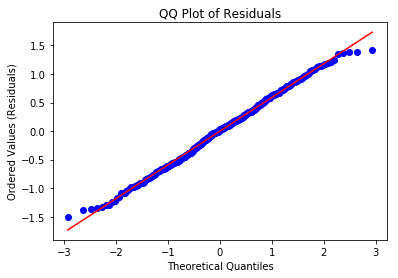

In [92]:
# QQ Plot

import scipy.stats as stats
import matplotlib.pyplot as plt

# Use the residuals from your filtered regression model

stats.probplot(residuals_filtered, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values (Residuals)')
plt.show()


In [93]:
# Calculation of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Prepare the independent variables
X = df_2k_unique[['rating', 'current_age', 'years_played']]
X = sm.add_constant(X)  # Adding a constant term for the intercept

# Calculating VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        feature         VIF
0         const  482.919338
1        rating    1.258402
2   current_age    6.777794
3  years_played    7.425705


In [95]:
# Jarque-Bera Test
from scipy.stats import jarque_bera

# Assuming model_transformed is your trained regression model

# Calculate residuals for the transformed model
residuals_model_transformed = model_transformed.resid

# Jarque-Bera test on residuals
jb_test_model_transformed = jarque_bera(residuals_model_transformed)

jb_test_model_transformed_results = {
    'JB statistic': jb_test_model_transformed[0],
    'p-value': jb_test_model_transformed[1]
}

print("Jarque-Bera Test Results for Transformed Model:", jb_test_model_transformed_results)


Jarque-Bera Test Results for Transformed Model: {'JB statistic': 233.47598394329543, 'p-value': 0.0}


In [96]:
formatted_p_value = "{:.10f}".format(p_value)

In [97]:
formatted_p_value

'0.0000000002'

In [98]:
# durbin_watson test
durbin_watson_stat = sm.stats.durbin_watson(model.resid)

durbin_watson_stat

1.810599298714244

In [104]:
# Backtest 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Calculating Q1, Q3 and IQR
Q1 = df_2k_unique['salary_log'].quantile(0.25)
Q3 = df_2k_unique['salary_log'].quantile(0.75)
IQR = Q3 - Q1

# Defining the range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_filtered = df_2k_unique[(df_2k_unique['salary_log'] >= lower_bound) & (df_2k_unique['salary_log'] <= upper_bound)]

# Prepare the independent and dependent variables
X = df_filtered[['rating', 'current_age', 'years_played']]
y = df_filtered['salary_log']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the model on the training data
X_train = sm.add_constant(X_train)  # Adding a constant term for the intercept
model_train = sm.OLS(y_train, X_train).fit()

# Predicting on the test data
X_test = sm.add_constant(X_test)  # Adding a constant term for the intercept
y_pred = model_train.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.47730790296038395


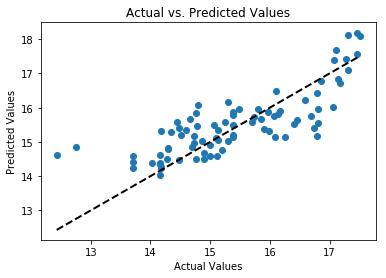

In [105]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values for the test set
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()
